In [1]:
%pwd

'C:\\Users\\mayan\\Documents\\My Code'

In [2]:
#loading package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

from tqdm import tqdm_notebook

import warnings
warnings.simplefilter('ignore')

import datetime

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [4]:
#changing directory
import os
os.chdir("D:\\Data Science\\Hackthon\\JanataHack-Ecommerce")

In [5]:
#Importing data
train = pd.read_csv("train_8wry4cB.csv")
test = pd.read_csv("test_Yix80N0.csv")

train.shape, test.shape

((10500, 5), (4500, 4))

In [6]:
train.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [7]:
test.head()

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [8]:
train.count()

session_id     10500
startTime      10500
endTime        10500
ProductList    10500
gender         10500
dtype: int64

In [9]:
train.describe()

,session_id,startTime,endTime,ProductList,gender
count,10500,10500,10500,10500,10500
unique,10500,8815,8803,9402,2
top,u24782,05/12/14 20:23,09/12/14 14:58,A00002/B00002/C00007/D00266/,female
freq,1,5,5,25,8192


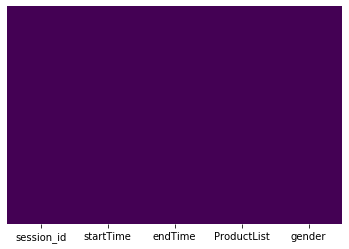

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
train.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
gender         0
dtype: int64

In [12]:
test.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
dtype: int64

In [13]:
train.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender'], dtype='object')

In [ ]:
#calculating timespent--train&test
train['Timediff']=pd.to_datetime(train['endTime'])-pd.to_datetime(train['startTime'])
train['TimeSpent(min)']=train['Timediff'].astype('timedelta64[m]')
#train['TimeSpent(sec)'] = train['Timediff'].apply(lambda x: x.seconds+x.days*24*3600)


test['Timediff']=pd.to_datetime(test['endTime'])-pd.to_datetime(test['startTime'])
test['TimeSpent(min)']=test['Timediff'].astype('timedelta64[m]')

In [ ]:
#of products-train&test
train['ProductListCount']=train['ProductList'].apply(lambda x:len(x.split(";")))

test['ProductListCount']=test['ProductList'].apply(lambda x:len(x.split(";")))

In [ ]:
#creating row for each product--train&test
temp_test = train['ProductList'].str.split(';')
train = train.reindex(train.index.repeat(temp_test.apply(len)))
train['Product'] = np.hstack(temp_test)

temp_test = test['ProductList'].str.split(';')
test = test.reindex(test.index.repeat(temp_test.apply(len)))
test['Product'] = np.hstack(temp_test)

In [ ]:
#creating category,sub,sub-sub&product_id column--test&train
train['Category']=train['Product'].str.split("/").str[0]
train['SubCategory']=train['Product'].str.split("/").str[1]
train['SubSubCategory']=train['Product'].str.split("/").str[2]
train['ProductCode']=train['Product'].str.split("/").str[3]

test['Category']=test['Product'].str.split("/").str[0]
test['SubCategory']=test['Product'].str.split("/").str[1]
test['SubSubCategory']=test['Product'].str.split("/").str[2]
test['ProductCode']=test['Product'].str.split("/").str[3]

In [ ]:
train.head()

In [ ]:
train.nunique()

In [ ]:
test.nunique()

In [ ]:
#droping uncessary columns--test& train
train = train.drop(['startTime','endTime','Product','ProductList','Timediff'],axis=1)

test =test.drop(['startTime','endTime','Product','ProductList','Timediff'],axis=1)

In [ ]:
train.dtypes

In [ ]:
test.dtypes

In [ ]:
len(test),len(train)

In [ ]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()

In [ ]:
#adding test and test before encoding
master = pd.concat([train,test],axis=0)

In [ ]:
len(master)

In [ ]:
master.to_csv("master_encded.csv")

In [ ]:
master.dtypes

In [ ]:
#encoding categorical columns-x variables--master
feature = ['Category', 'ProductCode','SubCategory', 'SubSubCategory','TimeSpent(min)','ProductListCount']

for col in feature:
    if master[col].dtypes=='O':
        master[col]=label_encoding.fit_transform(master[col])

In [ ]:
master.head(1)

In [ ]:
#subsetting train and test after encoding
train=master[master['gender'].notnull()]
test=master[master['gender'].isnull()]

In [ ]:
#drop gender from test
del test['gender']

In [ ]:
#encoding again gender of train set
train['gender']=label_encoding.fit_transform(train['gender'])

In [ ]:
#Function to print different model accuracy with cv3
def different_models(train, features, target, cv=3, metric='accuracy'):
    
    print("Different Models\n")
    eval_dict = {}
    models = [lgb.LGBMClassifier(), xgb.XGBClassifier(), GradientBoostingClassifier(), LogisticRegression(), 
              RandomForestClassifier(), DecisionTreeClassifier(), AdaBoostClassifier(),
              KNeighborsClassifier()]
    print("Model Name \t |   CV")
    print("--" * 50)

    for index, model in enumerate(models, 0):
        model_name = str(model).split("(")[0]
        eval_dict[model_name] = {}

        results = cross_val_score(model, train[features], train[target], cv=cv, scoring=metric)
        eval_dict[model_name]['cv'] = results.mean()

        print("%s \t | %.4f \t" % (
            model_name[:50], eval_dict[model_name]['cv']))

In [ ]:
different_models(train=train, features=feature, target='gender', cv=3, metric='accuracy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['gender','session_id'],axis=1), train['gender'], test_size=0.30, random_state=101)

In [ ]:
#create an instance and fit the model 
model = lgb.LGBMClassifier(random_state=7)
model.fit(X_train, y_train)

In [ ]:
Predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,Predictions))

In [ ]:
print(confusion_matrix(y_test, Predictions))

In [ ]:
#storing session id into temp var
testsession_id=pd.DataFrame(test['session_id'])

In [ ]:
#del session id
del test['session_id']

In [ ]:
#predicting gender on test data
test['gender']=model.predict(test[feature])

In [ ]:
#add session id columns
test_new=pd.concat([testsession_id,test],axis=1,sort=False)

In [ ]:
#inverse encoding
test_new['gender']=label_encoding.inverse_transform(test_new['gender'])

In [ ]:
#droping duplicates
test_new = test_new.drop_duplicates(subset=['session_id'])

In [ ]:
#output test data with target var
test_new.to_csv("Submission.csv",index=False)